# XOR - Logistic Regression
> 공부를 목적으로 정리한 노트북입니다.  
참고
1. https://github.com/deeplearningzerotoall/TensorFlow/blob/master/tf_2.x/lab-09-1-XOR-eager.ipynb  
수학적 정의는 Coursera의 Andrew NG 교수님의 수업을 추천합니다.

XOR문제를 로지스틱 회귀를 통해서 풀어보도록 하겠습니다.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt

## 1. 데이터

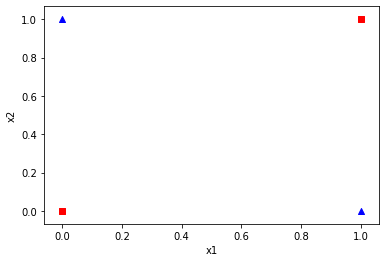

In [2]:
# 데이터
data_X = tf.constant([[0., 0.],[0., 1.],[1., 0.],[1., 1.]],dtype=tf.float32)
data_Y = tf.constant([[0.],[1.],[1.],[0.]],dtype=tf.float32)

# 데이터 시각화
plt.scatter(data_X[0][0].numpy(),data_X[0][1].numpy(), c='red' , marker='s')
plt.scatter(data_X[3][0].numpy(),data_X[3][1].numpy(), c='red' , marker='s')
plt.scatter(data_X[1][0].numpy(),data_X[1][1].numpy(), c='blue' , marker='^')
plt.scatter(data_X[2][0].numpy(),data_X[2][1].numpy(), c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## 2. 파라미터 및 함수 정의

### 파라미터

In [3]:
# 파라미터
W = tf.Variable(tf.random.normal([2,1]), dtype=tf.float32)
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32)

# 하이퍼 파라미터
learning_rate = 0.01
num_epoch = 1000

#### 가설함수 ( 시그모이드 )

In [4]:
# 함수 정의 ( 시그모이드 함수 )
def hypothesis(x):
    hypothesis = tf.divide(1., 1. + tf.exp(tf.matmul(x, W) + b))
    return hypothesis

#### 비용 함수 ( 로지스틱 회귀의 비용 함수)

In [5]:
# 비용 함수 ( 로지스틱 회귀의 비용함수 )
def loss(y_true, y_pred):
    return -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log( 1- y_pred))

#### 옵티마이저

In [6]:
# SGD ( ) ( optimizers 클래스 사용 )
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

#### 경사값(미분값) 구하기 

In [7]:
# 경사값 ( 미분 값 )
def grad(x,y):
    with tf.GradientTape() as tape:
        predict = hypothesis(x)
        cost = loss(y, predict)
    return tape.gradient(cost,[W,b])

#### 평가

In [8]:
# 평가
def evaluate(x,y):
    predict = tf.cast(hypothesis(x) > 0.5 , dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))
    return accuracy

## 3. 훈련 및 평가

In [9]:
# 훈련
for step in range(num_epoch):

    grads = grad(data_X, data_Y)
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))


    if(step % 100 == 0):
        print("Step : {}, Cost : {:.4f}".format(step, loss(data_Y, hypothesis(data_X))))
        
# 훈련 후 평가
print("W = {}, b = {}".format(W.numpy(), b.numpy()))
accuracy = evaluate(data_X, data_Y)
print("Accuracy : {}".format(accuracy))

Step : 0, Cost : 0.7881
Step : 100, Cost : 0.7675
Step : 200, Cost : 0.7548
Step : 300, Cost : 0.7461
Step : 400, Cost : 0.7397
Step : 500, Cost : 0.7347
Step : 600, Cost : 0.7304
Step : 700, Cost : 0.7268
Step : 800, Cost : 0.7235
Step : 900, Cost : 0.7206
W = [[ 0.8758151 ]
 [-0.00681137]], b = [-0.5322544]
Accuracy : 0.5


#### 테스트 결과
* 테스트 결과를 보면 50%인 것을 볼 수 있는데, 이는 로지스틱 회귀로는 XOR 문제를 풀 수 없다는 것을 증명한다.